In [79]:
# Hola!, soy Esteban, intento hacer una transición profesional hacia el mundo de la Ciencia de Datos. Soy un apasionado por las finanzas y el siguiente código
# trata sobre correlaciones entre diferentes activos financieros. En primer lugar, se seleccionan un conjunto de acciones 
# para luego realizar una correlación entre los rendimientos porcentuales de las mismas. Esta info puede ser de relevancia a
# la hora de armar un portafolio o cartera de inversiones. 

# Importante: la correlación mide el grado en que dos variables se mueven entre sí, y es útil recordar que "correlation
# does not imply causation", es decir, "la correlación no implica causa".

# The following code is about correlations between different financial assets. This information can be relevant in setting up 
# an investment portfolio.

# Important: the correlation measures the degree to which two variables move relative to each other and it can be useful to
# remember that "correlation does not imply causation". 

# Let´s import the needed libraries 

import pandas as pd 
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # This step is made to allow the Yahoo API to work (because it was discontinued)
import datetime as dt 
# To graph: matplotlib 
#%matplotlib inline   
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns 

In [80]:
tickers = ['GGAL.BA', 'BYMA.BA', 'BMA.BA', 'CRES.BA', 'PAMP.BA'] # I chose stocks from Argentina. But you can try different assets!
start = dt.datetime(2022, 2, 8)
 
data = pdr.get_data_yahoo(tickers, start)
data.info() # info method to get a sense of the data frame obtained via Yahoo
data = data['Adj Close']
data.head(10) # I want the first 10 dataframe rows to be shown
#log_returns = np.log(data/data.shift())

[*********************100%***********************]  5 of 5 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2022-02-08 to 2023-02-07
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BMA.BA)   245 non-null    float64
 1   (Adj Close, BYMA.BA)  245 non-null    float64
 2   (Adj Close, CRES.BA)  245 non-null    float64
 3   (Adj Close, GGAL.BA)  245 non-null    float64
 4   (Adj Close, PAMP.BA)  245 non-null    float64
 5   (Close, BMA.BA)       245 non-null    float64
 6   (Close, BYMA.BA)      245 non-null    float64
 7   (Close, CRES.BA)      245 non-null    float64
 8   (Close, GGAL.BA)      245 non-null    float64
 9   (Close, PAMP.BA)      245 non-null    float64
 10  (High, BMA.BA)        245 non-null    float64
 11  (High, BYMA.BA)       245 non-null    float64
 12  (High, CRES.BA)       245 non-null    float64
 13  (High, GGAL.BA)       245 non-null   

,BMA.BA,BYMA.BA,CRES.BA,GGAL.BA,PAMP.BA
Date,,,,,
2022-02-08,275.295654,117.681274,109.378700,191.238571,165.350006
2022-02-09,269.458679,119.231026,112.093765,187.656067,163.949997
2022-02-10,271.784363,118.081207,116.457283,188.693100,166.550003
2022-02-11,272.650818,119.480988,114.130074,185.864822,175.100006
2022-02-14,265.400177,117.281342,113.305855,183.225113,172.699997
2022-02-15,267.269745,117.181351,116.020927,185.440582,169.300003
2022-02-16,277.484467,119.181030,117.039078,192.464142,172.449997
2022-02-17,272.696381,120.130890,118.154198,188.645981,173.649994
2022-02-18,274.657227,118.881088,116.699699,190.625763,169.100006


In [81]:
log_returns = np.log(data/data.shift())


In [82]:
corr_df = log_returns.corr()
corr_df

,BMA.BA,BYMA.BA,CRES.BA,GGAL.BA,PAMP.BA
BMA.BA,1.000000,0.414668,0.534855,0.885718,0.657174
BYMA.BA,0.414668,1.000000,0.361208,0.393924,0.431740
CRES.BA,0.534855,0.361208,1.000000,0.513582,0.624011
GGAL.BA,0.885718,0.393924,0.513582,1.000000,0.618355
PAMP.BA,0.657174,0.431740,0.624011,0.618355,1.000000


<Figure size 432x288 with 0 Axes>

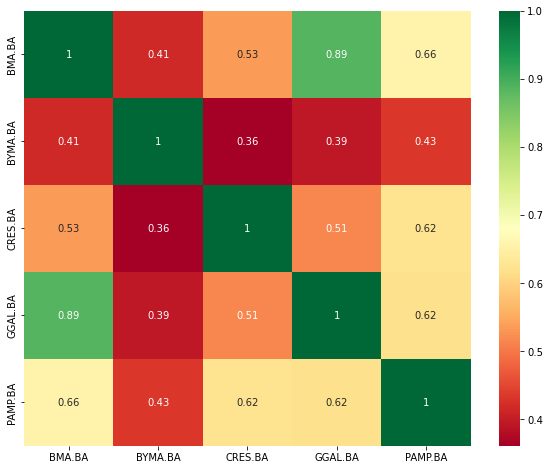

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(10, 8))  # Now I plot a heatmap of the correlations visualize the results. 
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()